In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#import
suicide_df = pd.read_csv("Suicides_per_year.csv")
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
gender_df= suicide_df["sex"]
gender_df

0          male
1          male
2        female
3          male
4          male
          ...  
27815    female
27816    female
27817      male
27818    female
27819    female
Name: sex, Length: 27820, dtype: object

In [4]:
male_df = suicide_df.loc[suicide_df["sex"]== "male",:]
male_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


In [5]:
male_dfg = male_df.groupby(["year"]).mean()["suicides/100k pop"]
male_dfg.head()

year
1985    17.875486
1986    17.033993
1987    17.556296
1988    19.095408
1989    19.581314
Name: suicides/100k pop, dtype: float64

In [6]:
female_df = suicide_df.loc[suicide_df["sex"] == "female",:]
female_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [7]:
female_dfg= female_df.groupby(["year"]).mean()["suicides/100k pop"]
female_dfg.head()

year
1985    5.776910
1986    5.812674
1987    5.732130
1988    6.323401
1989    6.176827
Name: suicides/100k pop, dtype: float64

In [36]:
combined_t = pd.DataFrame({"Male Suicide per 100k": male_dfg,
                       "Female Suicide per 100k": female_dfg})
combined_t.head()

,Male Suicide per 100k,Female Suicide per 100k
year,,
1985,17.875486,5.776910
1986,17.033993,5.812674
1987,17.556296,5.732130
1988,19.095408,6.323401
1989,19.581314,6.176827


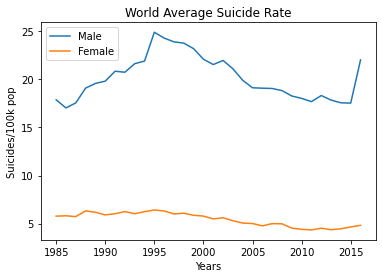

In [39]:
plt.plot(combined_t["Male Suicide per 100k"], label="Male")
plt.plot(combined_t["Female Suicide per 100k"], label="Female")
plt.title('World Average Suicide Rate')
plt.xlabel('Years')
plt.ylabel('Suicides/100k pop')
plt.legend()
plt.show()

In [20]:
usa_male = male_df.loc[male_df["country"] == "United States",:]
usa_male.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [21]:
usa_male_group = usa_male.groupby(["year"]).mean()["suicides/100k pop"]
usa_male_group.head()

year
1985    25.476667
1986    26.381667
1987    26.591667
1988    26.106667
1989    25.460000
Name: suicides/100k pop, dtype: float64

In [22]:
usa_female = female_df.loc[female_df["country"] == "United States",:]
usa_female.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26853,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,"4,346,734,000,000",19693,Silent
26854,United States,1985,female,55-74 years,1568,21366000,7.34,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26855,United States,1985,female,75+ years,466,7469000,6.24,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26856,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26857,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [23]:
usa_female_group = usa_female.groupby(["year"]).mean()["suicides/100k pop"]
usa_female_group.head()

year
1985    5.310000
1986    5.560000
1987    5.351667
1988    5.178333
1989    4.946667
Name: suicides/100k pop, dtype: float64

In [34]:
usa_combined = pd.DataFrame({"USA Avg Male Suicide": usa_male_group,
                             "USA Avg Female Suicide": usa_female_group})
usa_combined.head()

,USA Avg Male Suicide,USA Avg Female Suicide
year,,
1985,25.476667,5.310000
1986,26.381667,5.560000
1987,26.591667,5.351667
1988,26.106667,5.178333
1989,25.460000,4.946667


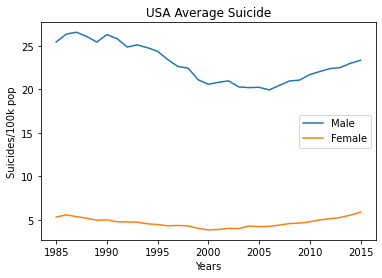

In [35]:
plt.plot(usa_combined["USA Avg Male Suicide"], label="Male")
plt.plot(usa_combined["USA Avg Female Suicide"], label="Female")
plt.title('USA Average Suicide')
plt.xlabel('Years')
plt.ylabel('Suicides/100k pop')
plt.legend()
plt.show()